Miguel Riaño

# Importacion de datos

## Librerias

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score
import pandas as pd

## Datos

In [ ]:
#Dataset Iris
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Preparación de los datos

In [ ]:
# separamos datos de entrada y salida
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
# separamos train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)

# Instanciacion de modelos

In [ ]:
categorical = CategoricalNB()
gaussian = GaussianNB()
multinomial = MultinomialNB()
complement = ComplementNB()
bernoulli = BernoulliNB()

# Matriz de confusión

In [ ]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adeante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray     -> Los valores calcuylados de las clases después de realizar la predicción
# class  : ndarray     -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None,
                          accuracy=None): # Added accuracy parameter
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    # Modify titleSup to include accuracy if provided
    if accuracy is not None:
        if titleSup is None:
            titleSup = f"Accuracy: {accuracy:.2f}"
        else:
            titleSup = f"{titleSup} (Accuracy: {accuracy:.2f})"

    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [ ]:
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)

/tmp/ipython-input-1757226867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
/tmp/ipython-input-1757226867.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_df['species'].replace(['setosa', 'versi

# Categorical

Confusion matrix, without normalization
[[17  0  0]
 [ 0 18  1]
 [ 0  0 14]]


/tmp/ipython-input-4037426791.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_categorical_df['species'] = y_model_categorical_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

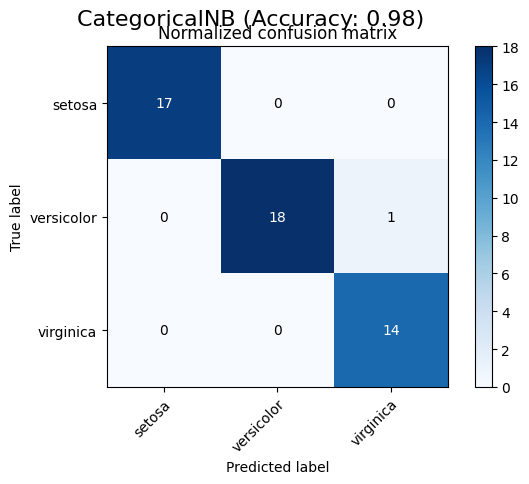

In [ ]:
import numpy as np
categorical.fit(Xtrain, ytrain)
y_model_categorical = categorical.predict(Xtest)

# Convert predictions to numeric labels
y_model_categorical_df = pd.DataFrame(y_model_categorical, columns = ['species'])
y_model_categorical_df['species'] = y_model_categorical_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])
y_model_categorical_array = y_model_categorical_df['species'].to_numpy()

# Calculate accuracy
accuracy_categorical = accuracy_score(ytest_df['species'], y_model_categorical_array)

# Creamos este array porque es el parámetro con las clases que espera la función
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])
plot_confusion_matrix(ytest_df['species'], y_model_categorical_array, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='CategoricalNB', accuracy=accuracy_categorical)

# Multinomial

Confusion matrix, without normalization
[[17  0  0]
 [ 0  1 18]
 [ 0  0 14]]


/tmp/ipython-input-1026946703.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_multinomial_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
/tmp/ipython-input-1026946703.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_multinomial_df['species

<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

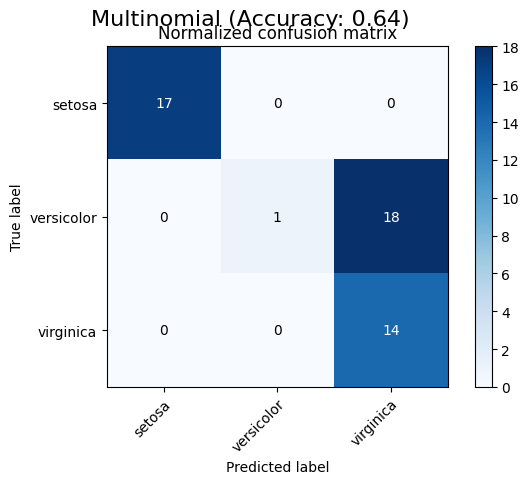

In [ ]:
multinomial.fit(Xtrain, ytrain)
y_model_multinomial = multinomial.predict(Xtest)

# Convert predictions to numeric labels
y_model_multinomial_df = pd.DataFrame(y_model_multinomial, columns = ['species'])
y_model_multinomial_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_multinomial_array = y_model_multinomial_df['species'].to_numpy()

# Calculate accuracy
accuracy_multinomial = accuracy_score(ytest_df['species'], y_model_multinomial_array)

# Plot the confusion matrix
plot_confusion_matrix(ytest_df['species'], y_model_multinomial_array, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='Multinomial', accuracy=accuracy_multinomial)

#Complement

Confusion matrix, without normalization
[[17  0  0]
 [ 0  0 19]
 [ 0  0 14]]


/tmp/ipython-input-621687768.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_complement_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
/tmp/ipython-input-621687768.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_complement_df['species'].r

<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

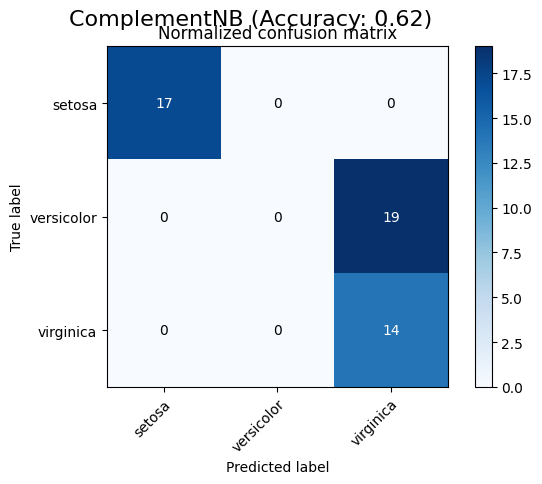

In [ ]:
complement.fit(Xtrain, ytrain)
y_model_complement = complement.predict(Xtest)

# Convert predictions to numeric labels
y_model_complement_df = pd.DataFrame(y_model_complement, columns = ['species'])
y_model_complement_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_complement_array = y_model_complement_df['species'].to_numpy()

# Calculate accuracy
accuracy_complement = accuracy_score(ytest_df['species'], y_model_complement_array)

# Plot the confusion matrix
plot_confusion_matrix(ytest_df['species'], y_model_complement_array, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='ComplementNB', accuracy=accuracy_complement)

# Bernoulli

Confusion matrix, without normalization
[[ 0  0 17]
 [ 0  0 19]
 [ 0  0 14]]


/tmp/ipython-input-3349594353.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_bernoulli_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
/tmp/ipython-input-3349594353.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_bernoulli_df['species'].r

<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

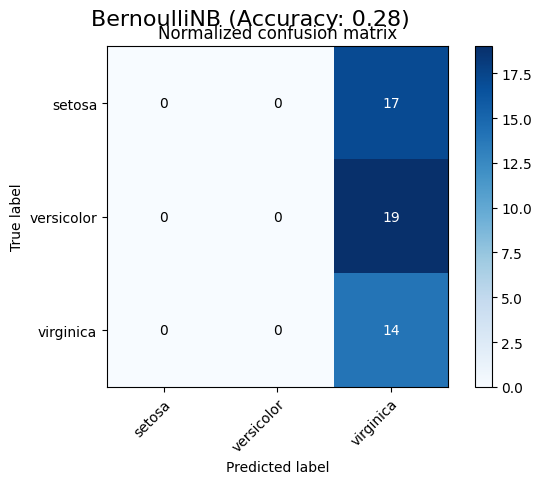

In [ ]:
bernoulli.fit(Xtrain, ytrain)
y_model_bernoulli = bernoulli.predict(Xtest)

# Convert predictions to numeric labels
y_model_bernoulli_df = pd.DataFrame(y_model_bernoulli, columns = ['species'])
y_model_bernoulli_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_bernoulli_array = y_model_bernoulli_df['species'].to_numpy()

# Calculate accuracy
accuracy_bernoulli = accuracy_score(ytest_df['species'], y_model_bernoulli_array)

# Plot the confusion matrix
plot_confusion_matrix(ytest_df['species'], y_model_bernoulli_array, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='BernoulliNB', accuracy=accuracy_bernoulli)

# Gaussian

Confusion matrix, without normalization
[[17  0  0]
 [ 0 17  2]
 [ 0  1 13]]


/tmp/ipython-input-1915201149.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_gaussian_df['species'] = y_model_gaussian_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

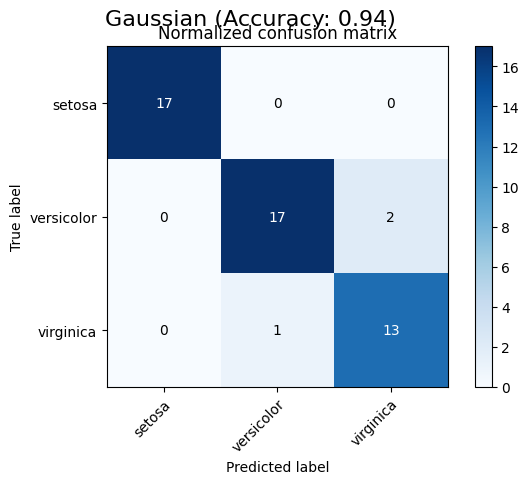

In [ ]:
gaussian.fit(Xtrain, ytrain)
y_model_gaussian = gaussian.predict(Xtest)

# Convert predictions to numeric labels
y_model_gaussian_df = pd.DataFrame(y_model_gaussian, columns = ['species'])
y_model_gaussian_df['species'] = y_model_gaussian_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])
y_model_gaussian_array = y_model_gaussian_df['species'].to_numpy()

# Calculate accuracy
accuracy_gaussian = accuracy_score(ytest_df['species'], y_model_gaussian_array)

# Plot the confusion matrix
plot_confusion_matrix(ytest_df['species'], y_model_gaussian_array, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='Gaussian', accuracy=accuracy_gaussian)